In [2]:
import pandas as pd
import numpy as np
import altair as alt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('multi-qa-mpnet-base-dot-v1')
def get_embeddings(texts):
  return model.encode(texts)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

MPNetModel LOAD REPORT from: sentence-transformers/multi-qa-mpnet-base-dot-v1
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [4]:
def get_pca(arr, n):
  pca = PCA(n_components=n)
  embeds_transform = pca.fit_transform(arr)
  return embeds_transform

In [5]:
# Load the dataset to a dataframe
df_orig = pd.read_csv('https://raw.githubusercontent.com/cohere-ai/notebooks/main/notebooks/data/atis_intents_train.csv', names=['intent','query'])

# Take a small sample for illustration purposes
sample_classes = ['atis_airfare', 'atis_airline', 'atis_ground_service']
df = df_orig[df_orig.intent.isin(sample_classes)]
df_orig = df_orig.drop(df.index)
df.reset_index(drop=True,inplace=True)

# Remove unnecessary column
intents = df['intent'] #save for a later need
df.drop(columns=['intent'], inplace=True)

In [6]:
# generate 786d text embeddings
embeds = get_embeddings(df['query'])
df['embeds'] = embeds.tolist()

In [33]:
# transform to 2d and 3d space
df['embeds_pca_2d'] = get_pca(embeds, 2).tolist()
df['embeds_pca_3d'] = get_pca(embeds, 3).tolist()

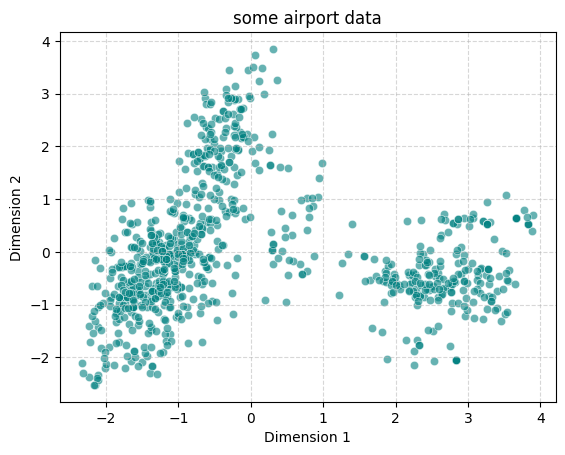

In [34]:
# visualize
matrix = np.stack(df['embeds_pca_2d'].values)

plt.scatter(matrix[:, 0], matrix[:, 1], alpha=0.6, edgecolors='w', linewidth=0.5, c='teal')
plt.title('some airport data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('scatterplog.png')

In [37]:
df[['x','y','z']] = pd.DataFrame(df['embeds_pca_3d'].tolist(), index=df.index)
fig = px.scatter_3d(df, x='x', y='y', z='z',
                    opacity=0.3,
                    hover_name='query',
                    hover_data={
                        'x': False,
                        'y': False,
                        'z': False
                    },
    title='some airport data')
fig.update_traces(marker=dict(size=4))
fig.show()